In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt 

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [2]:
from tensorflow.keras.datasets import imdb

Following along with the book Deep Learning with Python by Francois Chollet, 
determining positive or negative reviews


In [3]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words= 10000)

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
word_index = imdb.get_word_index()

### List decoding 
The imdb reviews are encoded so that the 10,000 most common words are given an integer each, and then the review is turned into a list. The dictionary which references this is word_index.items()
The function below, decodes a single review.


In [5]:
def Review_decode(review_index):
    reverse_word_index = dict(
        [(value, key) for (key,value) in word_index.items()])
    decoced_review = ' '.join(
    reverse_word_index.get(i-3,'?') for i in train_data [review_index]
    )
    return decoced_review

In order to input the reviews into a neural net in keras there are two options to vectorise the imput. Either have padded lists which have length = max length of the review. 
or each review can be encoded into a matrix of 10,000 x number words in review, where the inputs are one-hot. 

In [6]:
def vectorise_sequence(sequences, dimention = 10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
    

In [7]:
x_train = vectorise_sequence(train_data)
x_test = vectorise_sequence(test_data)


In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,partial_y_train,epochs= 20,batch_size=512,validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 34us/sample - loss: 1.8249e-07 - acc: 1.0000 - val_loss: 4.6109 - val_acc: 0.8566
Epoch 2/20
15000/15000 [==============================] - 0s 31us/sample - loss: 6.8682e-08 - acc: 1.0000 - val_loss: 4.5975 - val_acc: 0.8566
Epoch 3/20
15000/15000 [==============================] - 0s 32us/sample - loss: 3.5539e-08 - acc: 1.0000 - val_loss: 4.5852 - val_acc: 0.8573
Epoch 4/20
15000/15000 [==============================] - 0s 33us/sample - loss: 2.3288e-08 - acc: 1.0000 - val_loss: 4.5798 - val_acc: 0.8580
Epoch 5/20
15000/15000 [==============================] - 0s 33us/sample - loss: 1.6013e-08 - acc: 1.0000 - val_loss: 4.5790 - val_acc: 0.8578
Epoch 6/20
15000/15000 [==============================] - 0s 33us/sample - loss: 1.1303e-08 - acc: 1.0000 - val_loss: 4.5817 - val_acc: 0.8577
Epoch 7/20
15000/15000 [==============================] - 1s 33us/sample - loss: 9.3504e-09 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

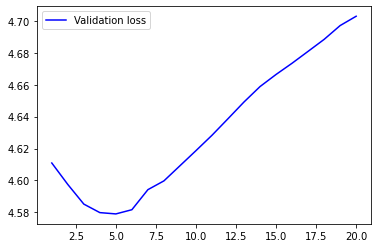

In [20]:

loss = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)


##Plotting 
plt.plot(epochs, val_loss_values,'b',label ='Validation loss')
#plt.plot(epochs, loss,'bo',label ='Training loss')
plt.legend()